# Version 1 of Implementation: Using Tensorflow

To first train and run the model on a relatively easy neural network, I'll be using TensorFlow. This provides me with a starting point, whereby I can reach the goals outlined for the first version of this project. 

I will run the handwriting data on a basic implementation of a TensorFlow neural network, assess the success metrics that I've outlined in the issue titled "Version 1", and aim to implement more complex models in future versions.

**Import Statements**

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL
import PIL.Image

**Data Preperation**

I'm starting off this notebook by loading, cleaning, and labelling handwriting data from the Hands PD (linked in the README file in this repository).

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory("/content/drive/My Drive/Spiral_HandPD", labels='inferred', label_mode='int',
    color_mode='rgb', image_size = (180, 180), shuffle = True, 
    validation_split=0.2,
    subset="training", seed = 1337)

Found 368 files belonging to 2 classes.
Using 295 files for training.


In [42]:
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory("/content/drive/My Drive/Spiral_HandPD", labels='inferred', label_mode='int',
    color_mode='rgb', image_size = (180, 180), shuffle = True, 
    validation_split=0.2,
    subset="validation", seed = 1337)

Found 368 files belonging to 2 classes.
Using 73 files for validation.


## Standardizing the data

In [43]:
from tensorflow.keras import layers

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_dataset.map(lambda x, y: (normalization_layer(x), y))


## Visualizing the initial datasets

In the titles shown below, 0 represents healthy spirals, and 1 represents patient spirals.

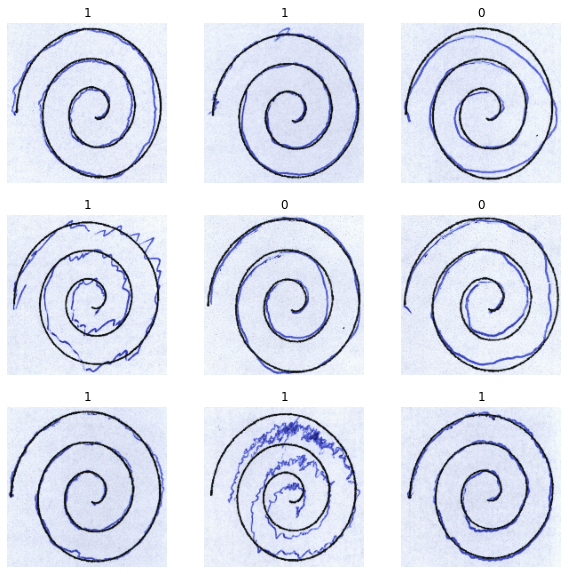

In [44]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(tf.squeeze(images[i].numpy().astype("uint8")))
        plt.title(int(labels[i]))
        plt.axis("off")

## Training the model

In [49]:
num_classes = 2

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

model.fit(
  train_dataset,
  validation_data=validation_dataset,
  epochs=3
)

Epoch 1/3
10/10 [==============================] - 10s 1s/step - loss: 0.8122 - accuracy: 0.7898 - val_loss: 0.4055 - val_accuracy: 0.8630
Epoch 2/3
10/10 [==============================] - 10s 1s/step - loss: 0.5425 - accuracy: 0.7898 - val_loss: 0.4154 - val_accuracy: 0.8630
Epoch 3/3
10/10 [==============================] - 10s 1s/step - loss: 0.5117 - accuracy: 0.7898 - val_loss: 0.3943 - val_accuracy: 0.8630
